In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.dates as mdates
import datetime

In [2]:
pwd

'C:\\Users\\feron\\TIL6022---Project'

In [3]:
df = pd.read_csv('data\data_congestion.csv')

#Load the dataframe that has been created by combining the other data downloaded from RWS

In [4]:
#df.head(5)

In [5]:
#to find the traffic jams around Delft
#KopWegvakVan en KopWegvakNaar is filtered for Delft so that we find all traffic jams around Delft.
df1 = df[(df["KopWegvakVan"].str.contains("Delft") == True) | (df["KopWegvakNaar"].str.contains("Delft") == True)]

In [6]:
#filter out all traffic jams that were caused by accidents
# or other unavoidable events

df1 = df1[df1['Oorzaak_1'] == 'Spitsfile (geen oorzaak gemeld)']

In [7]:
pd.set_option('display.max_columns', None)
#df1.head(5)

In [8]:
df1.set_index("DatumFileBegin_TijdFileBegin", inplace=True)
df1.index = pd.to_datetime(df1.index)   #convert the index column to date_time

In [9]:
df2 = df1.resample('M').size()               #counts the number of traffic jams per month to make a bar plot
date_convert = df2.index.strftime("%Y-%m")   #converts the datetime into a string with year and month
xlabels = []
for i in date_convert:
    xlabels.append(i)

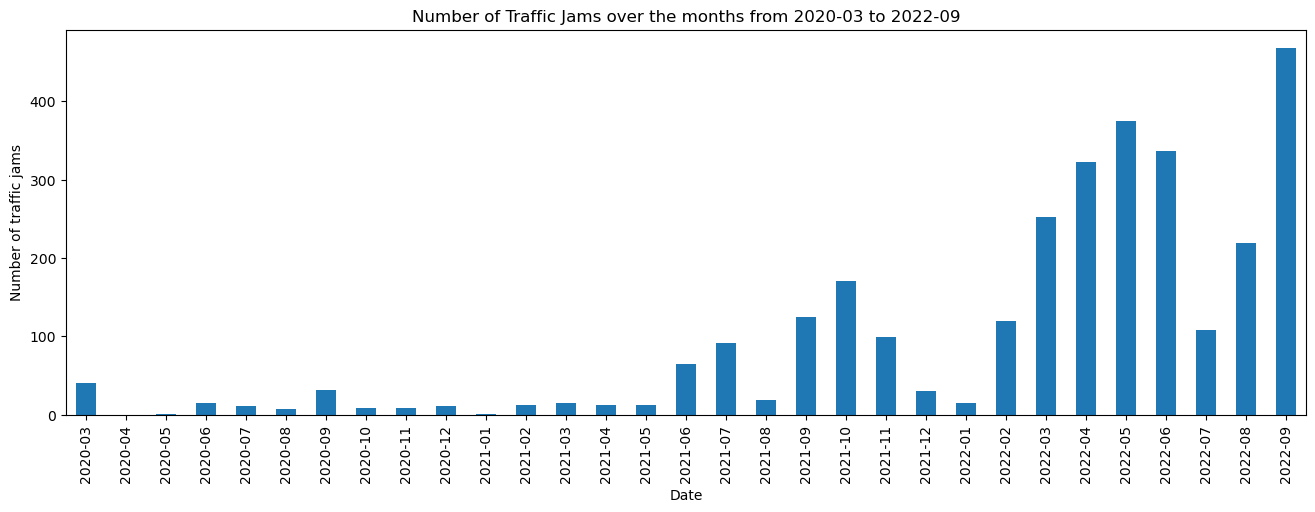

In [10]:
#This cell makes a plot of the number of traffic jams per month

fig, ax = plt.subplots(figsize=(16,5))
ax = df2.plot.bar()

ax.set_xticklabels(xlabels)
ax.set_xlabel('Date')
ax.set_ylabel('Number of traffic jams')
ax.set_title('Number of Traffic Jams over the months from 2020-03 to 2022-09');

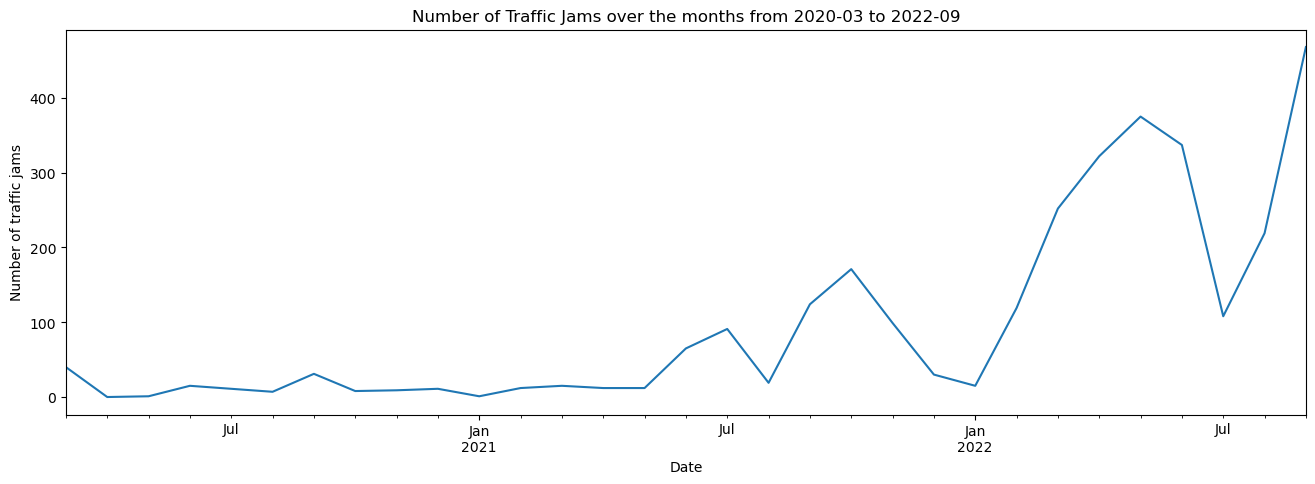

In [11]:
fig, ax = plt.subplots(figsize=(16,5))
ax = df2.plot()

ax.set_xlabel('Date')
ax.set_ylabel('Number of traffic jams')
ax.set_title('Number of Traffic Jams over the months from 2020-03 to 2022-09');